In [2]:
# this notebook is for plotting
# the end to end analysis
import numpy as np
import matplotlib.pyplot as plt
#load mdtraj
import mdtraj as md

In [3]:
# load beta amyloid structure
traj = md.load_xtc('../Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc', top='../Data/1hz3_T310.start.nowater.gro')

In [4]:
# compute the distance between the first and last atom
def end_end(traj):
    # get the first and last atom
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    # compute the distance between the first and last atom
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist

# compute the distance between the first and last atom
dist = end_end(traj)



In [5]:
# compute the radius of gyration at each time step
rg = md.compute_rg(traj)

[0.85057444 1.00091706 1.00509146 0.9700538  1.03096215 1.08965024
 1.06154491 1.01728751 1.0467843  1.25890696 1.03388204 1.18969875
 1.03686539 1.03002704 1.00622438 1.02566947 1.03948413]


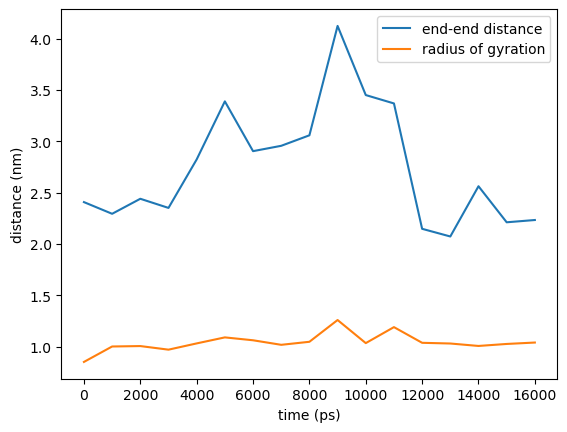

In [6]:
# plot the end-end distance and radius of gyration vs time on the same plot
plt.plot(traj.time, dist, label='end-end distance')
plt.plot(traj.time, rg, label='radius of gyration')
plt.xlabel('time (ps)')
plt.ylabel('distance (nm)')
plt.legend()

Text(0, 0.5, 'probability')

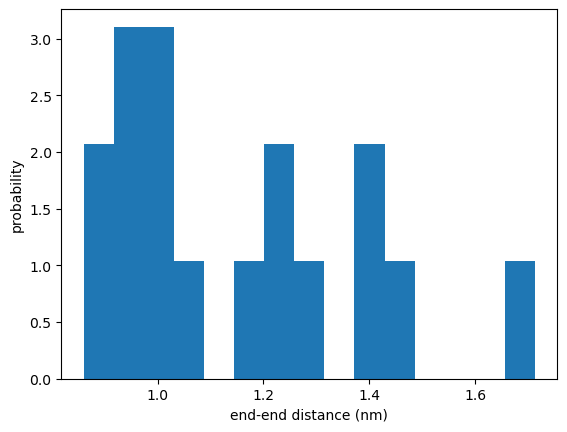

In [11]:
# plot a normalized histogram of end-end distance 
# normalize end-end distance
dist_norm = dist/dist[0]
plt.hist(dist_norm, bins=15, density=True)
plt.xlabel('end-end distance (nm)')
plt.ylabel('probability')


Text(0, 0.5, 'probability')

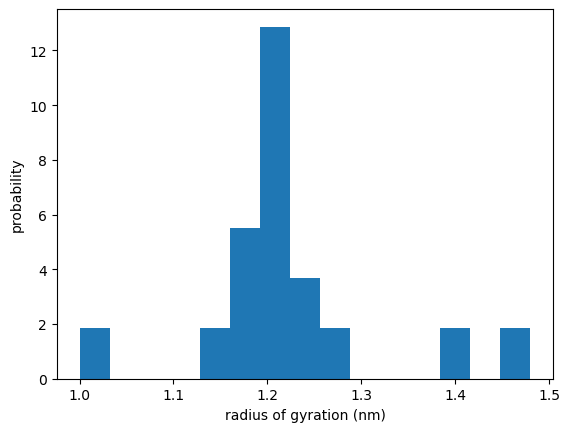

In [12]:
# plot a normalized histogram of radius of gyration
# normalize radius of gyration
rg_norm = rg/rg[0]
plt.hist(rg_norm, bins=15, density=True)
plt.xlabel('radius of gyration (nm)')
plt.ylabel('probability')
